In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

def leermd(filename):
    result = []
    df = read_csv(filename, sep='\t', skiprows=3, decimal=',')
    nparray = df.values
    nparray = nparray[~np.isnan(nparray).any(axis=1)]
    for cols in range(nparray.shape[1]):
        out = nparray[:,cols]
        result.append(out)
    return result

def temp_calc(filename,n):
    ts,ph = leermd(filename)
    dph = np.diff(ph)
    
    idx_i = np.where(dph<-2.5)[0]
    idx_d = np.where(dph>2.5)[0]
    
    idx_par_i = []
    idx_par_d = []
    for i in range(int(len(idx_i)/2)):
        idx_par_i.append(idx_i[2*i+1])
        idx_par_d.append(idx_d[2*i+1])
    temps = []
    for i in range(len(idx_par_d)):
        temps.append((ts[idx_par_i[i]]+ts[idx_par_d[i]])/2)
    prd = np.diff(temps)[0:n]
    return prd

def t_prom(filename,n):
    prd_tot = temp_calc(filename,n)
    return np.mean(prd_tot)

In [19]:
L_min = 40
L_max = 150
L_list = np.arange(L_min,L_max+10,10)
n = 40

lengths = L_list/100

T_list = []
for i in range(len(L_list)):
    T_list.append(t_prom(str(int(L_list[i]))+'.txt',n))

12
0


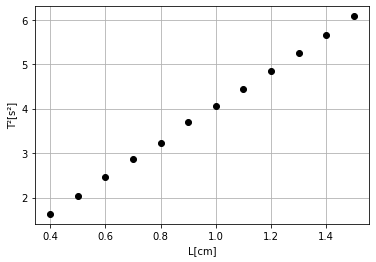

In [20]:
x = lengths
y = []
for i in range(len(T_list)):
    y.append(T_list[i]**2)
dx = np.loadtxt('errores_x.txt')
dy = np.loadtxt('errores_y.txt')

plt.errorbar(x,y,xerr=dx,yerr=dy,fmt='ko',ecolor='r')
plt.xlabel('L[cm]')
plt.ylabel('T²[s²]')
plt.grid()

err_rel_x = dx/x
err_rel_y = dy/y
print(sum(err_rel_x > err_rel_y))
print(sum(err_rel_x < err_rel_y))

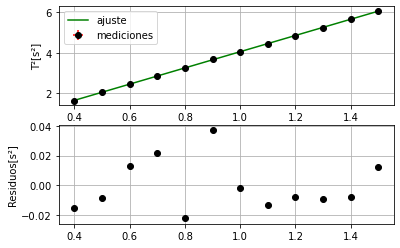

In [25]:
pars,cov = np.polyfit(x,y,deg=1,cov=True)
a, b = pars
Sa, Sb = np.sqrt(np.diag(cov))
err_a = cov[0,0]

y_aj = a*x+b

ax1 = plt.subplot(2,1,1)
plt.errorbar(x,y,xerr=dx,yerr=dy,fmt='ko',ecolor='r',label='mediciones')
plt.plot(x,y_aj,'g',label='ajuste')
plt.xlabel('L[cm]')
plt.ylabel('T²[s²]')
plt.legend()
plt.grid()

ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(x,y-y_aj,xerr=dx,yerr=dy,fmt='ko',ecolor='r')
plt.ylabel('Residuos[s²]')
plt.grid()

In [39]:
from math import floor

g0 = 4*np.pi**2/a
dg = 4*np.pi**2/a**2 * err_a
print('g = ' + str(round(g0,-int(floor(np.log10(abs(dg)))))) + ' ± ' + str(round(dg,-int(floor(np.log10(abs(dg)))))))

g = 9.8328 ± 0.0006


In [27]:
# residuos
res_sq = (y - y_aj) ** 2

# variabilidad intrínseca
ss_tot = np.sum((y - np.mean(y)) ** 2)

# R²
r2 = 1 - (np.sum(res_sq) / ss_tot)

# χ²
ss = res_sq/dy**2
ch2 = np.sum(ss)/(len(y)-2)

# pearson
from scipy.stats import pearsonr
rp = pearsonr(x, y)[0]